In [4]:
import numpy as np
import torch
import os
import torchvision
import sdc_config4 as sdc
import matplotlib.pyplot as plt

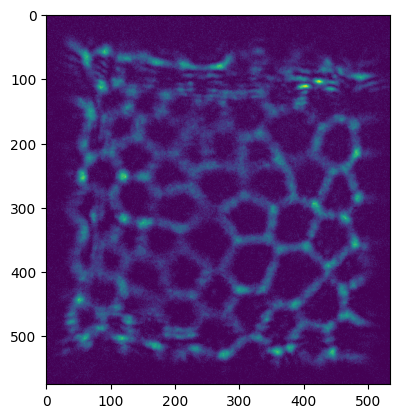

In [26]:
datafolder = '/media/azuldata/neerja/2024-01-30/psf/'
bits = 16
crop_indices = [825,1400,225,760]

psf_meas = sdc.importTiff(datafolder,'meas.tiff')/2**bits
try:
    background = sdc.importTiff(datafolder,'bg.tiff')/2**bits
except:
    print('No background image found, continuing without background subtraction')
    background = torch.zeros(sample_meas.shape)
psf = sdc.cropci((psf_meas-background).clip(0,1),crop_indices)
plt.imshow(psf)

save_loc = 'psf_2024-01-30.pt'
torch.save(psf,save_loc)

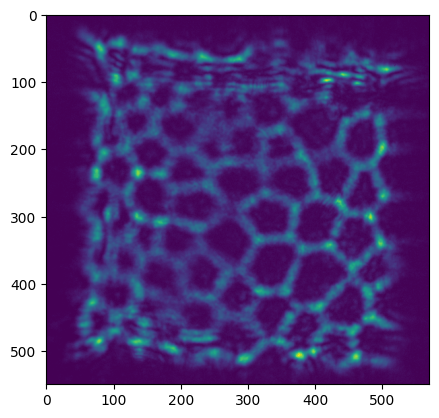

In [9]:
calibration_location = 'recon_materials_organized'
psf_name = 'psf_2023-11-16.pt'
sensor_psf = torch.load(os.path.join(calibration_location, psf_name),map_location='cpu')
plt.imshow(sensor_psf)

In [10]:
sensor_psf.shape

torch.Size([550, 570])